In [1]:
import sys
sys.path.append('/dls_sw/apps/scisoftpy/2.7')
sys.path.append('/dls_sw/i16/software/python')
from dlstools import *
from dlstools.pdnx import *
from matplotlib.pyplot import *

from dlstools.quickfit import *
import matplotlib.pyplot as plt

#%matplotlib inline
%matplotlib notebook
#%matplotlib nbagg

p='/dls/i16/data/2020/mm25913-2/%i.nxs'

=== Importing dlstools package


<IPython.core.display.Javascript object>


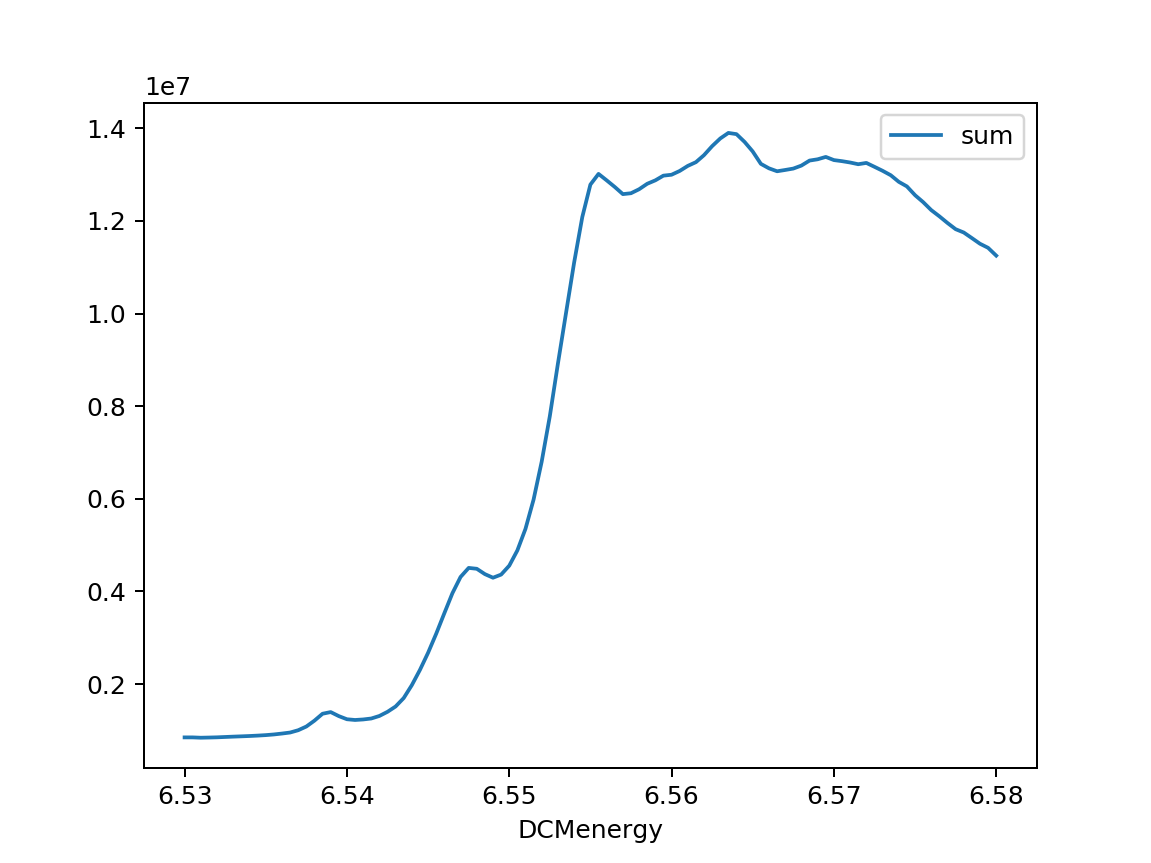

In [18]:
n = pdnx(p % 863885)
n.plot('DCMenergy','sum')


# Notes

Reflections ok (~0.04 deg) but in pairs

Didn't find ub matrix

Next: repeat search. Higher energy, continuous scans (kphi), large vertical roi, check phase

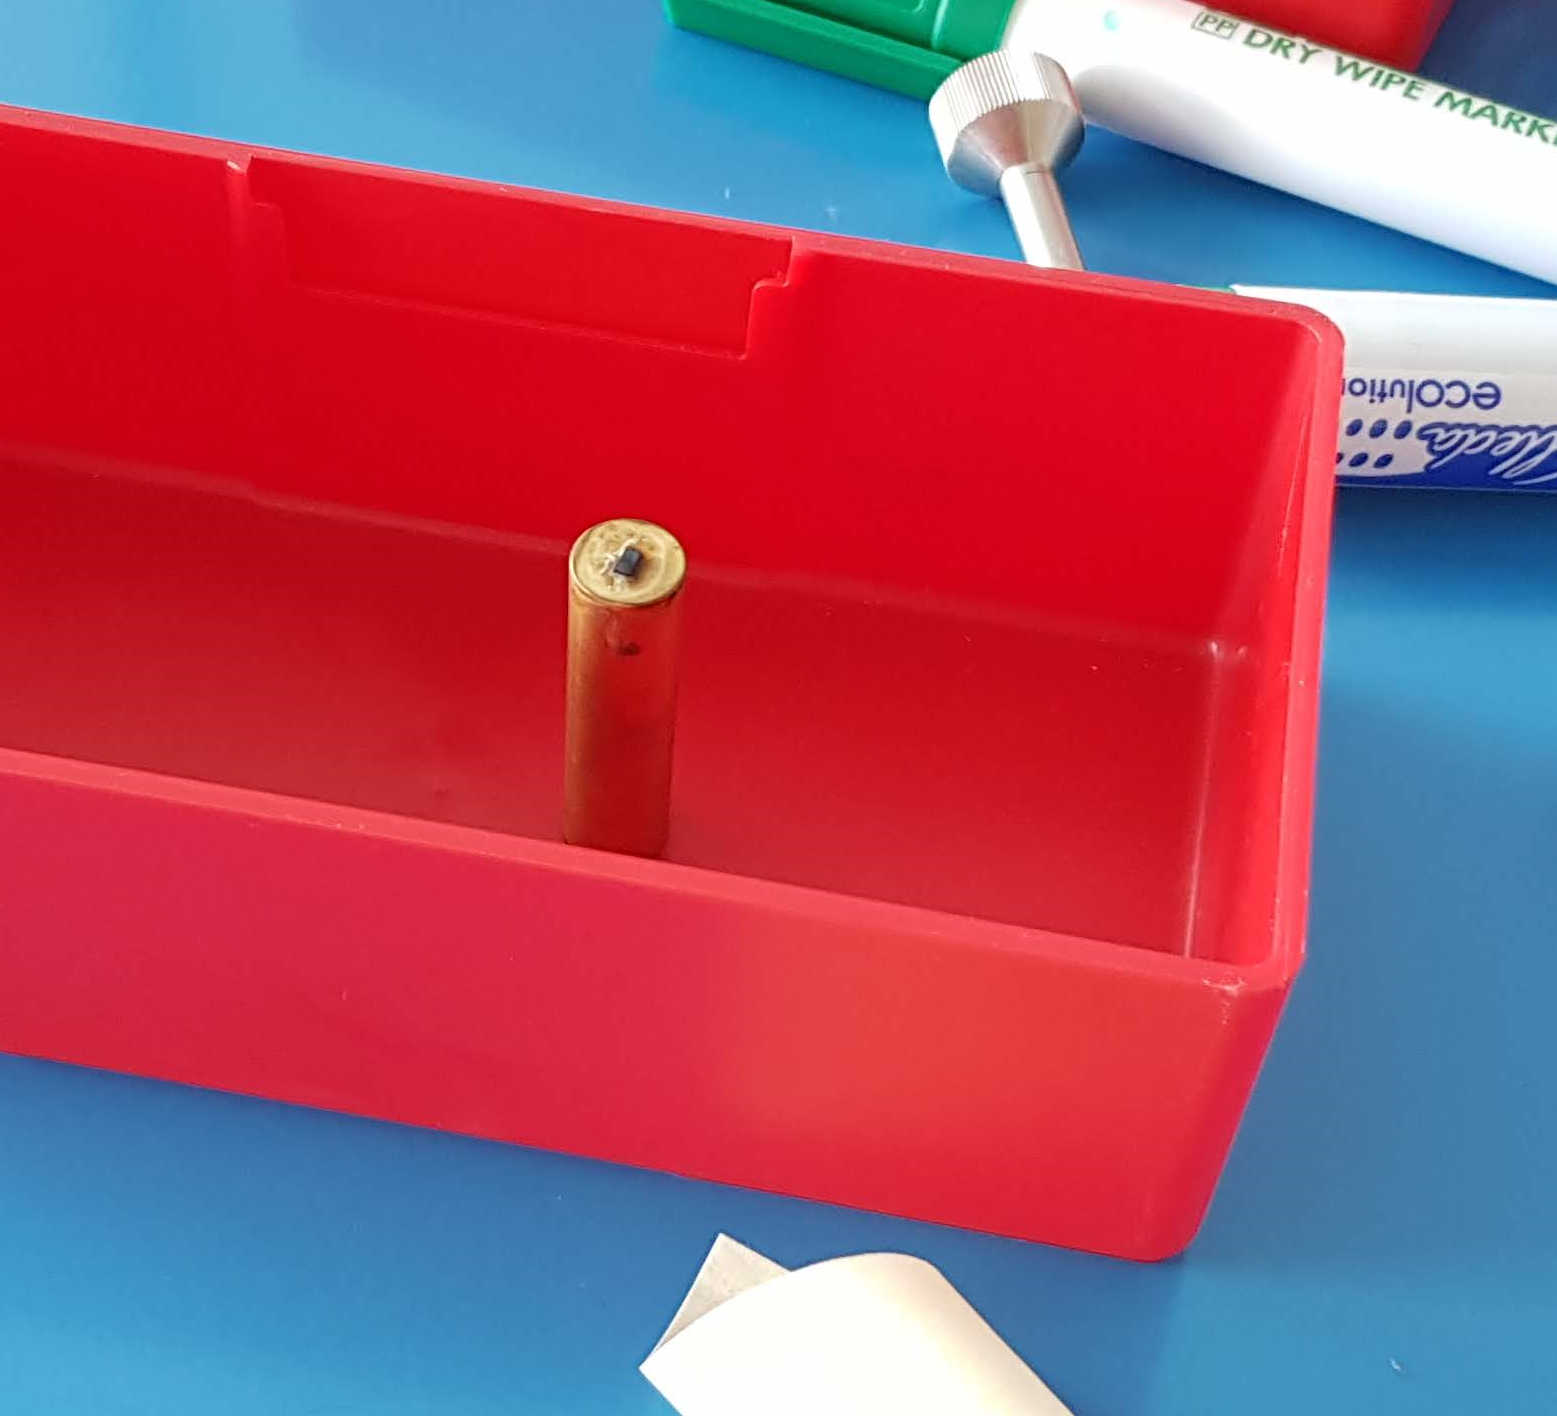



# 6th May 2021

In [1]:
import sys
sys.path.append('/dls_sw/apps/scisoftpy/2.7')
sys.path.append('/dls_sw/i16/software/python')
from dlstools import *
from dlstools.pdnx import *
from matplotlib.pyplot import *

from dlstools.quickfit import *
import matplotlib.pyplot as plt

#%matplotlib inline
%matplotlib notebook
#%matplotlib nbagg

p='/dls/i16/data/2021/cm28156-6/%i.nxs'

=== Importing dlstools package


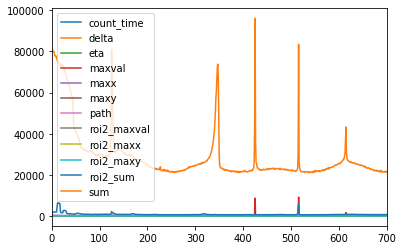

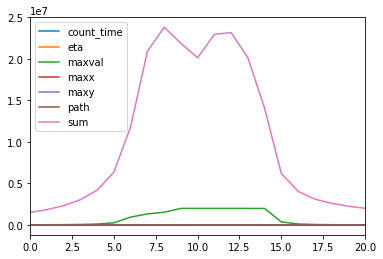

In [98]:
#th-tth scan. No clear peaks but found one by scanning around. Doesn't exactly match lattice.
n = pdnx(p % 884954)
n.plot()
n = pdnx(p % 884967) # eta scan over unknown peak (aligned and added to ref list)
n.plot()


#884990	delta: 16.7	kphi:chi: 90.0	kphi: -68.4	peak(sum): 8191	peak(ROI): 800
#884991	delta: 16.7	kphi:chi: 87.0	kphi: -72.3	peak(sum): 8391	peak(ROI): 787
#884992	delta: 16.7	kphi:chi: 84.0	kphi: 151.9	peak(sum): 10466	peak(ROI): 843
#884993	delta: 16.7	kphi:chi: 81.0	kphi: 65.1	peak(sum): 14015	peak(ROI): 911
#884994	delta: 16.7	kphi:chi: 78.0	kphi: 62.1	peak(sum): 14017	peak(ROI): 982
#884995	delta: 16.7	kphi:chi: 75.0	kphi: 59.4	peak(sum): 49648	peak(ROI): 983
#884996	delta: 16.7	kphi:chi: 72.0	kphi: -5.3	peak(sum): 2744101	peak(ROI): 1065
#884997	delta: 16.7	kphi:chi: 69.0	kphi: 17.1	peak(sum): 2837027	peak(ROI): 883
#884998	delta: 16.7	kphi:chi: 66.0	kphi: 239.0	peak(sum): 3015023	peak(ROI): 868
#884999	delta: 16.7	kphi:chi: 63.0	kphi: 203.8	peak(sum): 3046846	peak(ROI): 936
#885000	delta: 16.7	kphi:chi: 60.0	kphi: 201.8	peak(sum): 2582863	peak(ROI): 923
#885001	delta: 16.7	kphi:chi: 57.0	kphi: 48.8	peak(sum): 2591109	peak(ROI): 4621
#885002	delta: 16.7	kphi:chi: 54.0	kphi: 179.0

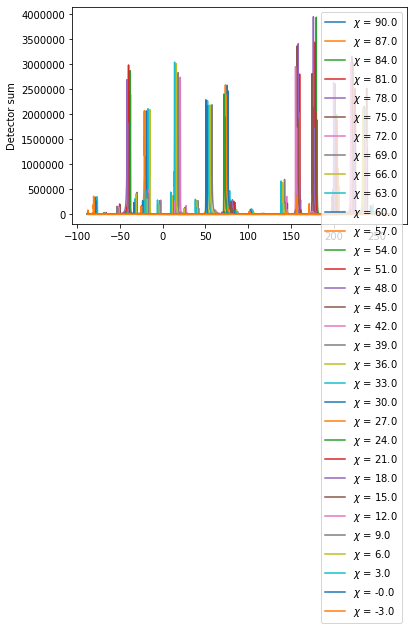

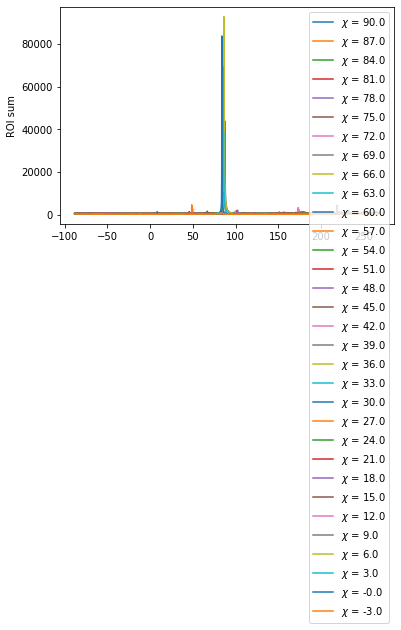

In [151]:
# cvscans kphi/chi over [004]
roi = [0, 194, 216, 266] # integrate over width and central region in length
for scan in range(884990, 885021+1):
    n = pdnx(p % scan) 
    n['dsum'] = n.nx.entry1.kphiZebraPil3.data.sum(axis=(1,2))
    n['roisum'] = n.nx.entry1.kphiZebraPil3.data[:, roi[0]:roi[1], roi[2]:roi[3]].sum(axis=(1,2))
    chi = n.nx.entry1.before_scan.diffractometer_sample.chi
    delta = n.nx.entry1.before_scan.diffractometer_sample.delta
    chistr = '$\chi$ = %.1f' % chi
    print('#%i\tdelta: %.1f\tchi: %.1f\tkphi: %.1f\tpeak(sum): %i\tpeak(ROI): %i' % (scan, delta, chi, n.kphiZebra[int(np.where(n.roisum == n.roisum.max())[0])], n.dsum.max(), n.roisum.max()))
    figure(1); plot(n.kphiZebra, n.dsum, label = chistr); legend(); ylabel('Detector sum')
    figure(2); plot(n.kphiZebra, n.roisum, label = chistr); legend(); ylabel('ROI sum')

#885022	delta: 30.8	kphi:chi: 90.0	kphi: 88.8	peak(sum): 36555	peak(ROI): 2529
#885023	delta: 30.8	kphi:chi: 87.0	kphi: -42.6	peak(sum): 6185	peak(ROI): 638
#885024	delta: 30.8	kphi:chi: 84.0	kphi: 236.9	peak(sum): 40809	peak(ROI): 7260
#885025	delta: 30.8	kphi:chi: 81.0	kphi: 233.5	peak(sum): 45942	peak(ROI): 8128
#885026	delta: 30.8	kphi:chi: 78.0	kphi: 230.6	peak(sum): 133795	peak(ROI): 6508
#885027	delta: 30.8	kphi:chi: 75.0	kphi: 21.3	peak(sum): 595245	peak(ROI): 1619
#885028	delta: 30.8	kphi:chi: 72.0	kphi: 21.4	peak(sum): 826303	peak(ROI): 9018
#885029	delta: 30.8	kphi:chi: 69.0	kphi: 19.7	peak(sum): 2062350	peak(ROI): 30828
#885030	delta: 30.8	kphi:chi: 66.0	kphi: 18.0	peak(sum): 2505793	peak(ROI): 60436
#885031	delta: 30.8	kphi:chi: 63.0	kphi: 130.1	peak(sum): 2838401	peak(ROI): 984
#885032	delta: 30.8	kphi:chi: 60.0	kphi: 127.8	peak(sum): 2680671	peak(ROI): 1099
#885033	delta: 30.8	kphi:chi: 57.0	kphi: -18.6	peak(sum): 400256	peak(ROI): 885
#885034	delta: 30.8	kphi:chi: 54.0	

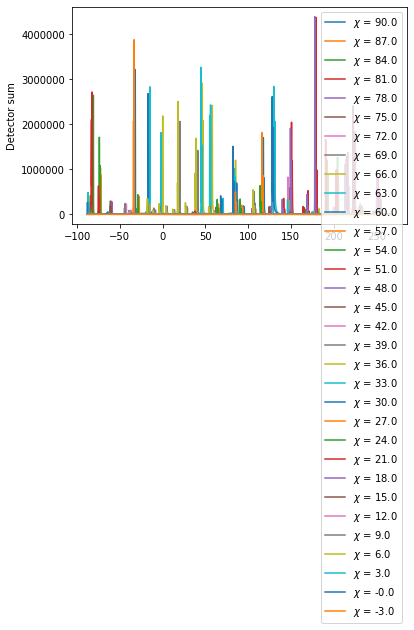

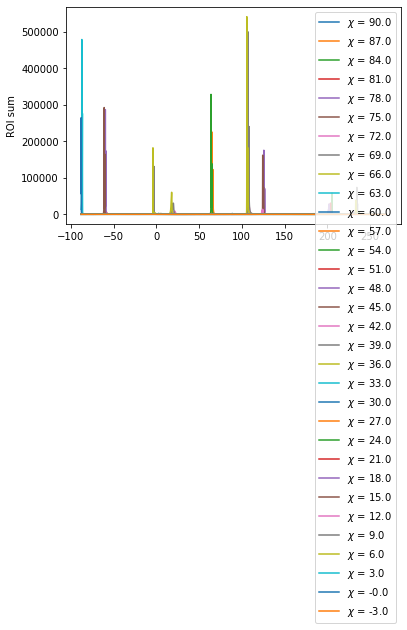

In [152]:
# cvscans kphi/chi over [220]
roi = [0, 194, 216, 266] # integrate over width and central region in length
for scan in range(885022, 885053+1):
    n = pdnx(p % scan) 
    n['dsum'] = n.nx.entry1.kphiZebraPil3.data.sum(axis=(1,2))
    n['roisum'] = n.nx.entry1.kphiZebraPil3.data[:, roi[0]:roi[1], roi[2]:roi[3]].sum(axis=(1,2))
    chi = n.nx.entry1.before_scan.diffractometer_sample.chi
    delta = n.nx.entry1.before_scan.diffractometer_sample.delta
    chistr = '$\chi$ = %.1f' % chi
    print('#%i\tdelta: %.1f\tchi: %.1f\tkphi: %.1f\tpeak(sum): %i\tpeak(ROI): %i' % (scan, delta, chi, n.kphiZebra[int(np.where(n.roisum == n.roisum.max())[0])], n.dsum.max(), n.roisum.max()))
    figure(1); plot(n.kphiZebra, n.dsum, label = chistr); legend(); ylabel('Detector sum')
    figure(2); plot(n.kphiZebra, n.roisum, label = chistr); legend(); ylabel('ROI sum')

#885054	delta: 35.7	kphi:chi: 90.0	kphi: 105.2	peak(sum): 10952	peak(ROI): 1744
#885055	delta: 35.7	kphi:chi: 87.0	kphi: 224.0	peak(sum): 6317	peak(ROI): 593
#885056	delta: 35.7	kphi:chi: 84.0	kphi: 220.6	peak(sum): 25053	peak(ROI): 554
#885057	delta: 35.7	kphi:chi: 81.0	kphi: 246.1	peak(sum): 22664	peak(ROI): 682
#885058	delta: 35.7	kphi:chi: 78.0	kphi: 214.0	peak(sum): 127328	peak(ROI): 598
#885059	delta: 35.7	kphi:chi: 75.0	kphi: 211.9	peak(sum): 20467	peak(ROI): 621
#885060	delta: 35.7	kphi:chi: 72.0	kphi: 210.4	peak(sum): 121283	peak(ROI): 762
#885061	delta: 35.7	kphi:chi: 69.0	kphi: 13.8	peak(sum): 83149	peak(ROI): 1111
#885062	delta: 35.7	kphi:chi: 66.0	kphi: 52.2	peak(sum): 202760	peak(ROI): 1901
#885063	delta: 35.7	kphi:chi: 63.0	kphi: 125.1	peak(sum): 358747	peak(ROI): 2582
#885064	delta: 35.7	kphi:chi: 60.0	kphi: 75.3	peak(sum): 1043868	peak(ROI): 1038541
#885065	delta: 35.7	kphi:chi: 57.0	kphi: 72.4	peak(sum): 1225819	peak(ROI): 1220367
#885066	delta: 35.7	kphi:chi: 54.0	kp

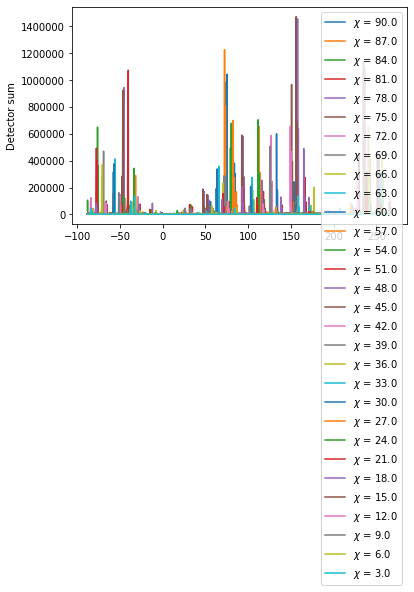

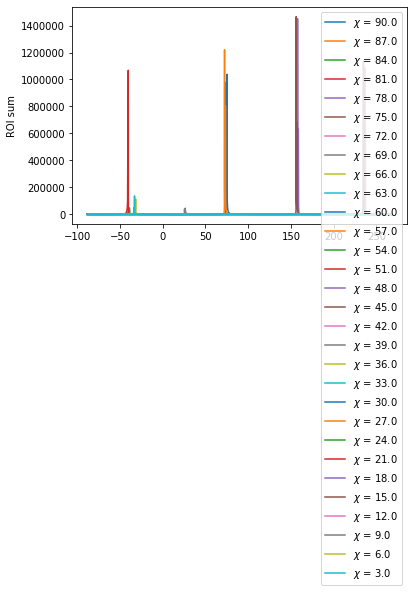

In [154]:
# cvscans kphi/chi over [400]
roi = [0, 194, 216, 266] # integrate over width and central region in length
for scan in range(885054, 885083+1):
    n = pdnx(p % scan) 
    n['dsum'] = n.nx.entry1.kphiZebraPil3.data.sum(axis=(1,2))
    n['roisum'] = n.nx.entry1.kphiZebraPil3.data[:, roi[0]:roi[1], roi[2]:roi[3]].sum(axis=(1,2))
    chi = n.nx.entry1.before_scan.diffractometer_sample.chi
    delta = n.nx.entry1.before_scan.diffractometer_sample.delta
    chistr = '$\chi$ = %.1f' % chi
    print('#%i\tdelta: %.1f\tchi: %.1f\tkphi: %.1f\tpeak(sum): %i\tpeak(ROI): %i' % (scan, delta, chi, n.kphiZebra[int(np.where(n.roisum == n.roisum.max())[0])], n.dsum.max(), n.roisum.max()))
    figure(1); plot(n.kphiZebra, n.dsum, label = chistr); legend(); ylabel('Detector sum')
    figure(2); plot(n.kphiZebra, n.roisum, label = chistr); legend(); ylabel('ROI sum')

#885086	delta: 12.1	chi: 90.0	kphi: -57.2	peak(sum): 16378	peak(ROI): 1343
#885087	delta: 12.1	chi: 87.0	kphi: -7.4	peak(sum): 17118	peak(ROI): 1339
#885088	delta: 12.1	chi: 84.0	kphi: -45.9	peak(sum): 17519	peak(ROI): 1323
#885089	delta: 12.1	chi: 81.0	kphi: -40.7	peak(sum): 19395	peak(ROI): 1299
#885090	delta: 12.1	chi: 78.0	kphi: 6.6	peak(sum): 24548	peak(ROI): 1284
#885091	delta: 12.1	chi: 75.0	kphi: 3.2	peak(sum): 70769	peak(ROI): 1260
#885092	delta: 12.1	chi: 72.0	kphi: -87.4	peak(sum): 3608764	peak(ROI): 1256
#885093	delta: 12.1	chi: 69.0	kphi: 62.3	peak(sum): 3620385	peak(ROI): 1550
#885094	delta: 12.1	chi: 66.0	kphi: -10.3	peak(sum): 3682671	peak(ROI): 2153
#885095	delta: 12.1	chi: 63.0	kphi: -12.4	peak(sum): 3692044	peak(ROI): 1425
#885096	delta: 12.1	chi: 60.0	kphi: 238.7	peak(sum): 16856	peak(ROI): 1380
#885097	delta: 12.1	chi: 57.0	kphi: 120.4	peak(sum): 865995	peak(ROI): 143568
#885098	delta: 12.1	chi: 54.0	kphi: 118.6	peak(sum): 1705988	peak(ROI): 108522
#885099	delta: 1

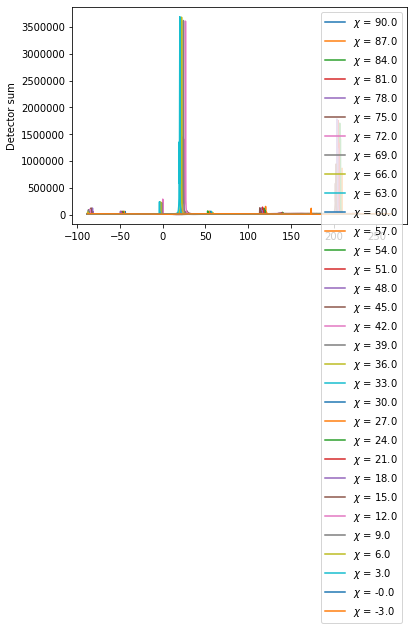

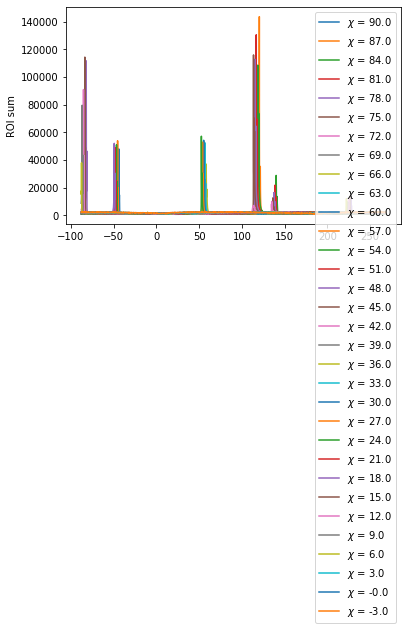

In [163]:
#refs = [[1, 0, 2], [2, -1, 0]]
# cvscans kphi/chi over [102]
roi = [0, 194, 216, 266] # integrate over width and central region in length
for scan in range(885086, 885117+1):
    n = pdnx(p % scan) 
    n['dsum'] = n.nx.entry1.kphiZebraPil3.data.sum(axis=(1,2))
    n['roisum'] = n.nx.entry1.kphiZebraPil3.data[:, roi[0]:roi[1], roi[2]:roi[3]].sum(axis=(1,2))
    chi = n.nx.entry1.before_scan.diffractometer_sample.chi
    delta = n.nx.entry1.before_scan.diffractometer_sample.delta
    chistr = '$\chi$ = %.1f' % chi
    print('#%i\tdelta: %.1f\tchi: %.1f\tkphi: %.1f\tpeak(sum): %i\tpeak(ROI): %i' % (scan, delta, chi, n.kphiZebra[int(np.where(n.roisum == n.roisum.max())[0])], n.dsum.max(), n.roisum.max()))
    figure(1); plot(n.kphiZebra, n.dsum, label = chistr); legend(); ylabel('Detector sum')
    figure(2); plot(n.kphiZebra, n.roisum, label = chistr); legend(); ylabel('ROI sum')

#885118	delta: 15.3	chi: 90.0	kphi: 137.6	peak(sum): 9766	peak(ROI): 1548
#885119	delta: 15.3	chi: 87.0	kphi: 11.2	peak(sum): 9701	peak(ROI): 1809
#885120	delta: 15.3	chi: 84.0	kphi: 18.3	peak(sum): 10356	peak(ROI): 2602
#885121	delta: 15.3	chi: 81.0	kphi: 21.8	peak(sum): 14106	peak(ROI): 4279
#885122	delta: 15.3	chi: 78.0	kphi: 23.1	peak(sum): 25189	peak(ROI): 9127
#885123	delta: 15.3	chi: 75.0	kphi: 23.6	peak(sum): 54996	peak(ROI): 46418
#885124	delta: 15.3	chi: 72.0	kphi: 22.5	peak(sum): 3280140	peak(ROI): 3272252
#885125	delta: 15.3	chi: 69.0	kphi: 20.1	peak(sum): 3257458	peak(ROI): 3249223
#885126	delta: 15.3	chi: 66.0	kphi: 17.9	peak(sum): 3352998	peak(ROI): 3345002
#885127	delta: 15.3	chi: 63.0	kphi: 15.9	peak(sum): 3321355	peak(ROI): 3314186
#885128	delta: 15.3	chi: 60.0	kphi: 14.7	peak(sum): 2228981	peak(ROI): 3216
#885129	delta: 15.3	chi: 57.0	kphi: 207.2	peak(sum): 2157180	peak(ROI): 783340
#885130	delta: 15.3	chi: 54.0	kphi: 204.5	peak(sum): 3391204	peak(ROI): 2749844
#8851

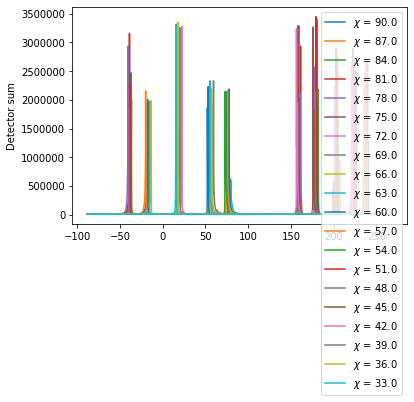

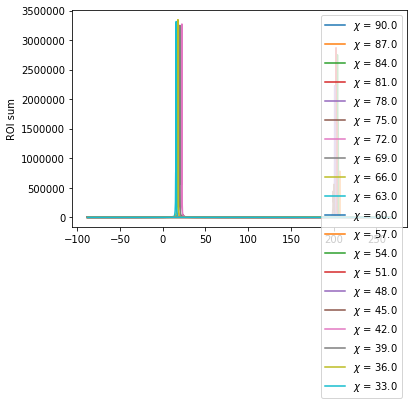

In [172]:
#refs = [[1, 0, 2], [2, -1, 0]]
# cvscans kphi/chi over [2m10]
roi = [0, 194, 216, 266] # integrate over width and central region in length
for scan in range(885118, 885137+1):
    n = pdnx(p % scan) 
    n['dsum'] = n.nx.entry1.kphiZebraPil3.data.sum(axis=(1,2))
    n['roisum'] = n.nx.entry1.kphiZebraPil3.data[:, roi[0]:roi[1], roi[2]:roi[3]].sum(axis=(1,2))
    chi = n.nx.entry1.before_scan.diffractometer_sample.chi
    delta = n.nx.entry1.before_scan.diffractometer_sample.delta
    chistr = '$\chi$ = %.1f' % chi
    print('#%i\tdelta: %.1f\tchi: %.1f\tkphi: %.1f\tpeak(sum): %i\tpeak(ROI): %i' % (scan, delta, chi, n.kphiZebra[int(np.where(n.roisum == n.roisum.max())[0])], n.dsum.max(), n.roisum.max()))
    figure(1); plot(n.kphiZebra, n.dsum, label = chistr); legend(); ylabel('Detector sum')
    figure(2); plot(n.kphiZebra, n.roisum, label = chistr); legend(); ylabel('ROI sum')

## Sample oriented - go to Mn K edge

In [157]:
ci, cj = 242, 95    #26/9/18
maxi=486; maxj=194  #08/10/15
delroi = (int(ci-1/2.),0,int(ci+1/2.),maxj)

#roi1 = scroi=HardwareTriggerableDetectorDataProcessor('roi1', pil3, [SumMaxPositionAndValue()])
#iw=13; jw=15; roi1.setRoi(int(ci-iw/2.),int(cj-jw/2.),int(ci+iw/2.),int(cj+jw/2.))
#roi2 = lcroi=HardwareTriggerableDetectorDataProcessor('roi2', pil3, [SumMaxPositionAndValue()])
#iw=50; jw=50; roi2.setRoi(int(ci-iw/2.),int(cj-jw/2.),int(ci+iw/2.),int(cj+jw/2.))
#roi3 = delroi=HardwareTriggerableDetectorDataProcessor('roi3', pil3, [SumMaxPositionAndValue()])

r = delroi; n.nx.entry1.kphiZebraPil3.data[:, r[1]:r[3], r[0]:r[2]].sum(axis=(1,2))

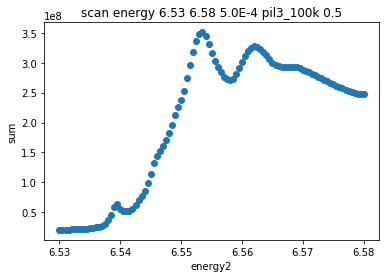

In [236]:
n = pdnx(p %885158)
n.nx.plot()

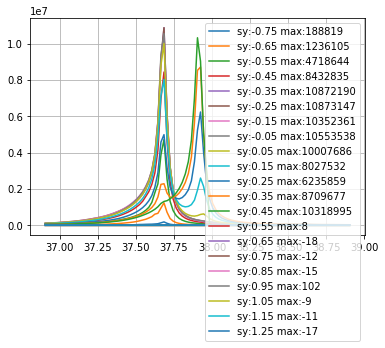

In [181]:
figure()
for scan in range(885165, 885185+1):
    n = pdnx(p % scan)
    labtxt = 'sy:%.2f max:%i' % (n.nx.entry1.before_scan.positions.sy, max(n['sum']))
    plot(n.eta, n['sum'], label = labtxt)
grid(1); legend()
#sy = -.25 looks OK

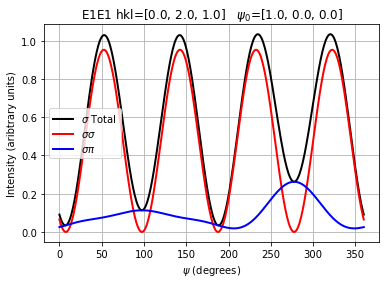

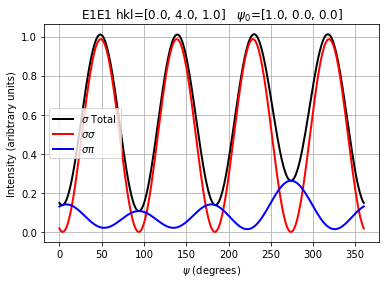

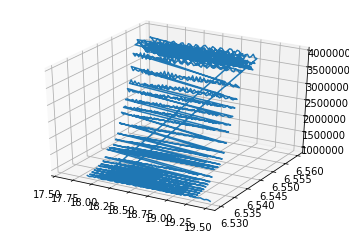

In [237]:
fig = plt.figure()
ax = fig.gca(projection='3d')
en, eta, cts = [], [], []

for scan in range(885262, 885324+1):
    n = pdnx(p % scan)
    en += list(n.nx.entry1.sample.beam.incident_energy * np.ones(len(n.eta)))
    eta += list(n.eta) 
    cts += list(n.roi2_sum)
    
ax.plot(eta, en, cts)



In [ ]:
# Didn't find resonance (probably)
# sample quality marginal - etch?
# need to fit latice paremeters better
# Fluo spectrum different from August - strong dichroism?
# pil100kthresh not working
# default scannables lost
# the OO4 axis is the long axis of the sample (checked at end with COR camera).